In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

%matplotlib inline
plt.style.use('fivethirtyeight')

df = pd.read_csv('https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/vaccinations.csv', parse_dates = ['date'])
df.drop(['iso_code'], axis = 1, inplace = True)
df

,location,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,daily_vaccinations_per_million
0,Afghanistan,2021-02-22,0.0,0.0,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN
1,Afghanistan,2021-02-23,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,NaN,34.0
2,Afghanistan,2021-02-24,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,NaN,34.0
3,Afghanistan,2021-02-25,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,NaN,34.0
4,Afghanistan,2021-02-26,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,NaN,34.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
45161,Zimbabwe,2021-09-01,4270430.0,2615233.0,1655197.0,NaN,50606.0,36416.0,28.30,17.33,10.97,NaN,2413.0
45162,Zimbabwe,2021-09-02,4323735.0,2649505.0,1674230.0,NaN,53305.0,39711.0,28.65,17.56,11.09,NaN,2631.0
45163,Zimbabwe,2021-09-03,4372216.0,2681657.0,1690559.0,NaN,48481.0,42317.0,28.97,17.77,11.20,NaN,2804.0
45164,Zimbabwe,2021-09-04,4400246.0,2698332.0,1701914.0,NaN,28030.0,41413.0,29.16,17.88,11.28,NaN,2744.0


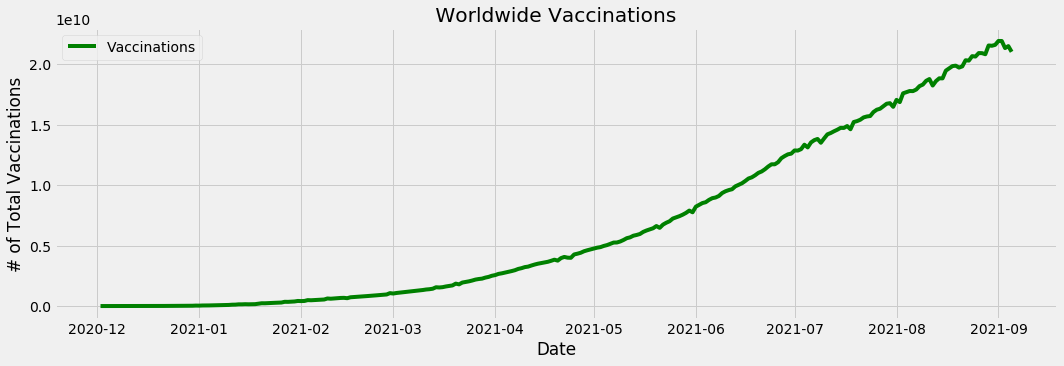

In [5]:
# Worldwide Vaccinations

worldwide_df = df.groupby(['date']).sum()
fig = plt.figure(figsize = (16,5))

ax = fig.add_subplot(111)

ax.plot(worldwide_df[['total_vaccinations']], color = 'g', label = 'Vaccinations')

ax.set_xlabel('Date')
ax.set_ylabel('# of Total Vaccinations')
ax.title.set_text(' Worldwide Vaccinations ')

plt.legend(loc = 'upper left')
plt.show()

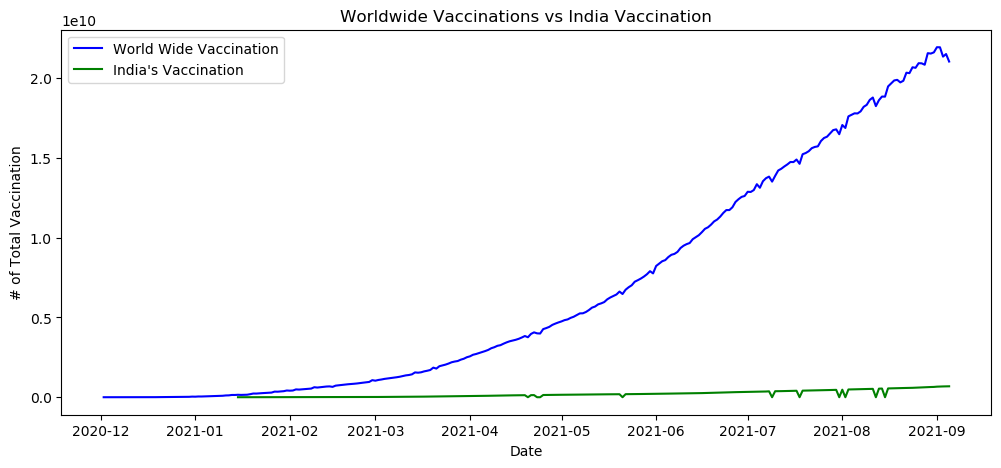

In [12]:
# Worldwide Vaccinations vs India Vaccination

plt.style.use('default')
india_df = df[df['location'] == 'India'].groupby(['date']).sum()

fig = plt.figure(figsize = (12,5))
ax = fig.add_subplot(111)

ax.plot(worldwide_df[['total_vaccinations']], color = 'b', label = 'World Wide Vaccination')
ax.plot(india_df[['total_vaccinations']],color = 'g', label = 'India\'s Vaccination')

ax.set_xlabel('Date')
ax.set_ylabel('# of Total Vaccination')
ax.title.set_text('Worldwide Vaccinations vs India Vaccination')

plt.legend(loc = 'upper left')
plt.show()

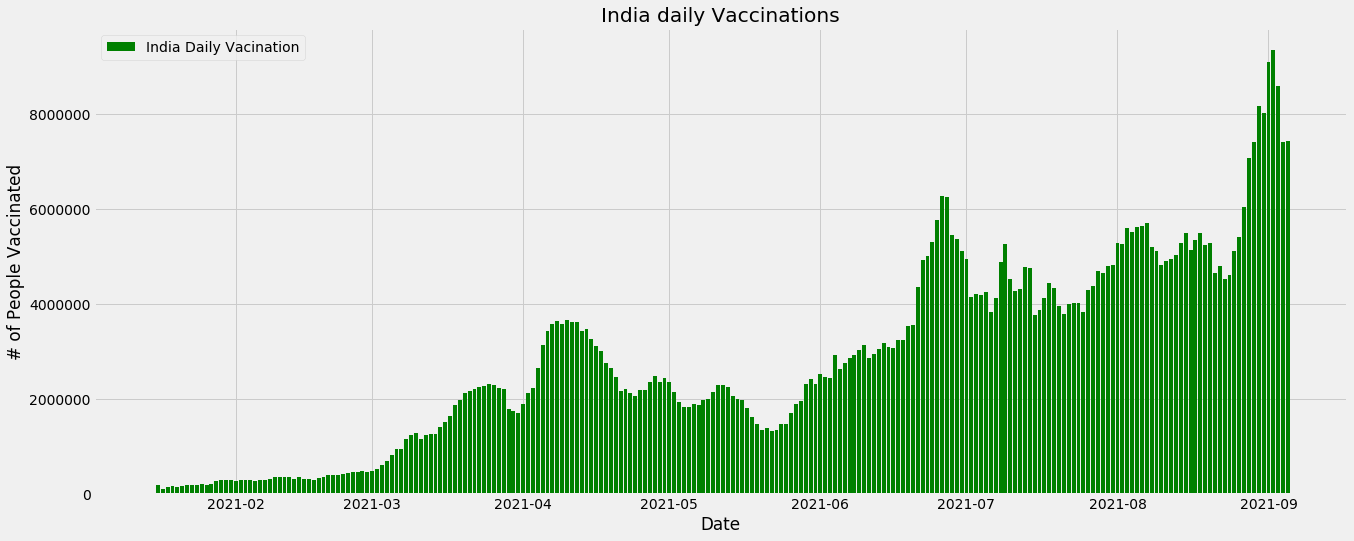

In [25]:
# India daily Vaccinations

#india_df = india_df.reset_index()

fig = plt.figure(figsize = (20,8))
ax = fig.add_subplot(111)

ax.bar(india_df['date'], india_df['daily_vaccinations'], color = 'g', label = 'India Daily Vacination')
ax.set_xlabel('Date')
ax.set_ylabel('# of People Vaccinated')

ax.title.set_text('India daily Vaccinations')

plt.legend(loc = 'upper left')
plt.show()

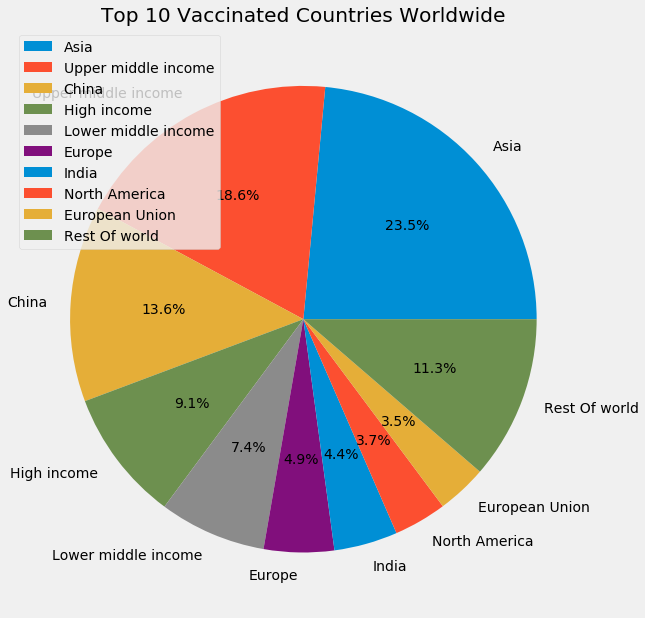

In [28]:
# Top 10 Vaccinated 

from datetime import date, timedelta
yesterday = date.today() - timedelta(days = 1)
yesterday.strftime('%Y-%m-%d')

today_df = df[df['date'] == '2021-09-05']

top_10 = today_df.sort_values(['total_vaccinations'], ascending = False)[1:10]
top_10.loc['rest-of-world'] = today_df.sort_values(['total_vaccinations'], ascending = False)[10:].sum()
top_10.loc['rest-of-world', 'location'] = 'Rest Of world'

fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111)

ax.pie(top_10['total_vaccinations'], labels = top_10['location'], autopct = '%1.1f%%')
ax.title.set_text('Top 10 Vaccinated Countries Worldwide')

plt.legend(loc = 'upper left')
plt.show()

In [35]:
today_df['location']

430      High income
1904     High income
2480     High income
2683     High income
2936     High income
            ...     
42221    High income
43254    High income
43445    High income
44742    High income
45165    High income
Name: location, Length: 70, dtype: object